In [7]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy
import scipy.signal as signal

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

# Open barbara image
img_jpg = mpimg.imread("barbara.jpg")
img_hr = rgb2gray(img_jpg)

# plot image
def plotImage(img):
    fig = plt.figure()
    plt.gray()  
    plt.imshow(img)
    plt.show() 
    
plotImage(img_hr)

ModuleNotFoundError: No module named 'cv2'

Convolve the image

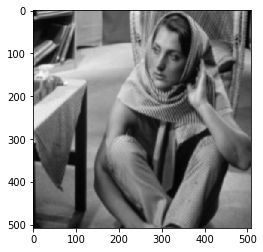

In [5]:
img_conv = signal.convolve2d(img_hr, np.ones((5,5)), mode='valid')  

plotImage(img_conv)

On decale l'image

In [6]:
import numpy as np

rows, cols = img_conv.shape

translations = [(0,1),(4,1),(1,4)]

img_trans = []
for translation in translations:
    img_trans.append(scipy.ndimage.shift(img_conv, translation))
    
plotImage(img_trans[0])

ModuleNotFoundError: No module named 'cv2'

Down Sampling

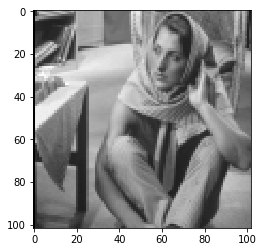

In [39]:
step = 5
img_downs = []
for img_tran in img_trans:
    img_downs.append(img_tran[:img_tran.shape[0]:step, :img_tran.shape[1]:step])

plotImage(img_downs[0])

Add noise

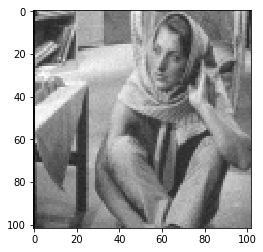

In [40]:
img_brs = []
for img_down in img_downs:
    img_brs.append(img_down + np.random.normal(size=img_down.shape, scale=100))

plotImage(img_brs[0])

Imege a trou

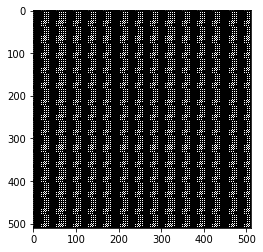

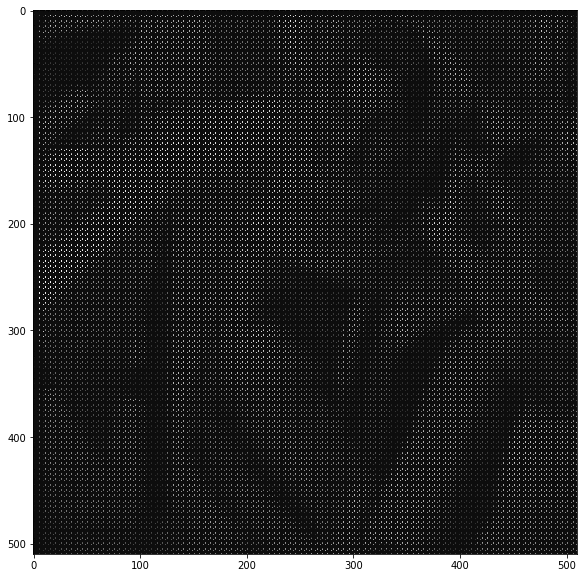

In [71]:
# Matrix
shape = [img_brs[0].shape[0]*step, img_brs[0].shape[1]*step]

M = np.zeros(shape=shape)
# Image composée des 3 images basse resolution
img_sum = np.zeros(shape=shape)

index = 0
for x,y in translations:
    M[x:shape[0]:step, y:shape[1]:step] = 1
    img_sum[x:shape[0]:step, y:shape[1]:step] += img_brs[index]
    index += 1

plotImage(M)   

# plot image
fig = plt.figure(figsize=(10,10))
plt.gray()  
plt.imshow(img_sum)
plt.show()

Inpainting

(510, 510)


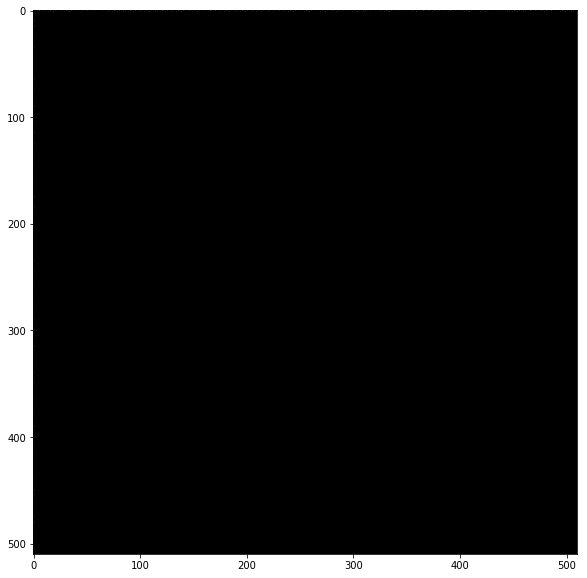

In [77]:
import cv2
img_hr_est = cv2.inpaint(np.uint8(img_sum), np.uint8(M), 5, cv2.INPAINT_TELEA)

# plot image
plotImage(img_hr_est)

In [78]:
prox_tv._prox_tv.tvp_2d

for t in range(100):
    x = xt
    gradient = np.transpose(M)*(y-M*xt)
    z = xt - gradient
    xtt = rox_tv._prox_tv.tvp_2d(z)
    xtt = xtt + (t/t+4)*(xt-xtt) 

    

NameError: name 'prox_tv' is not defined